In [1]:
import pandas as pd
import numpy as np
from ISLP import load_data
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data_western = pd.read_csv('/Users/happyeveryday/Downloads/Celebrity_recognition_project/western_celebs_results.csv')  
data_asian = pd.read_csv('/Users/happyeveryday/Downloads/Celebrity_recognition_project/chinese_celebs_results.csv')  

## Step 1:
We first calculate the accuracy for each category. The result indicate that our chosen API is tend to bettern recognize western celebrities.

In [8]:
miss_rate_western = np.sum(data_western['incorrect']) / (np.sum(data_western['incorrect']) + np.sum(data_western['correct']))
accuracy_western = 1 - miss_rate_western
miss_rate_chinese = np.sum(data_asian['incorrect']) / (np.sum(data_asian['incorrect']) + np.sum(data_asian['correct']))
accuracy_chinese = 1 - miss_rate_chinese
print(f'The percent of Western celebrities incorrectly or not identified is: {miss_rate_western * 100} %')
print(f'The percent of Western celebrities correctly identified is: {accuracy_western * 100} %')
print(f'The percent of Chinese celebrities incorrectly or not identified is: {miss_rate_chinese * 100} %')
print(f'The percent of Chinese celebrities correctly identified is: {accuracy_chinese * 100} %')

The percent of Western celebrities incorrectly or not identified is: 10.606060606060606 %
The percent of Western celebrities correctly identified is: 89.39393939393939 %
The percent of Chinese celebrities incorrectly or not identified is: 19.11764705882353 %
The percent of Chinese celebrities correctly identified is: 80.88235294117648 %


## Step 2:
After the previous steps, we got the data set being nicely sorted. Then we what to capture some features of the data. Our first idea is to see if there is any relationship betweent the celebrity earning and the recognition success rate. In general, we believe that the earning can be linked to the social influence, and more social influence means more possible that the API can recognize their images. We use OLS to determine if it is linear and find the best fit of the line.

In [9]:

# Preprocess the data
data_western['Earnings'] = data_western['Earnings'].replace({'\$': '', ' million': ''}, regex=True).astype(float) * 1e6
data_western['avg_correct_confidence'] = data_western['avg_correct_confidence'].fillna(0)  # Replace NaN with 0

# Define the independent variable (Earnings) and add a constant to it
X = sm.add_constant(data_western['Earnings'])

# Define the dependent variable (avg_correct_confidence)
y = data_western['avg_correct_confidence']

# Create the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     avg_correct_confidence   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                 -0.031
Method:                     Least Squares   F-statistic:                    0.1569
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):              0.695
Time:                            23:43:18   Log-Likelihood:                -139.63
No. Observations:                      29   AIC:                             283.3
Df Residuals:                          27   BIC:                             286.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [10]:
data_asian['Earnings'] = data_asian['Earnings'].replace({'\$': '', ' million yuan': ''}, regex=True).astype(float) * 1e6
data_asian['avg_correct_confidence'] = data_asian['avg_correct_confidence'].fillna(0)  # Replace NaN with 0

# Define the independent variable (Earnings) and add a constant to it
X = sm.add_constant(data_asian['Earnings'])

# Define the dependent variable (avg_correct_confidence)
y = data_asian['avg_correct_confidence']

# Create the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     avg_correct_confidence   R-squared:                       0.017
Model:                                OLS   Adj. R-squared:                 -0.007
Method:                     Least Squares   F-statistic:                    0.6890
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):              0.411
Time:                            23:43:27   Log-Likelihood:                -214.99
No. Observations:                      43   AIC:                             434.0
Df Residuals:                          41   BIC:                             437.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

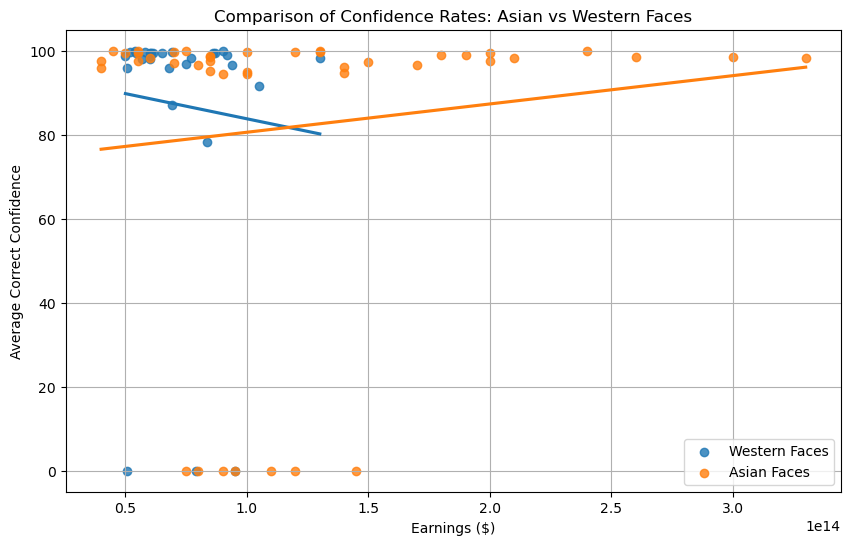

In [11]:
data_western['Earnings'] = data_western['Earnings'].replace({'\$': '', ' million': ''}, regex=True).astype(float) * 1e6
data_asian['Earnings'] = data_asian['Earnings'].replace({'\$': '', ' million yuan': ''}, regex=True).astype(float) * 1e6

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Earnings', y='avg_correct_confidence', data=data_western, ci=None, label='Western Faces')
sns.regplot(x='Earnings', y='avg_correct_confidence', data=data_asian, ci=None, label='Asian Faces')

plt.title('Comparison of Confidence Rates: Asian vs Western Faces')
plt.xlabel('Earnings ($)')
plt.ylabel('Average Correct Confidence')
plt.legend()
plt.grid(True)
plt.show()

### Result analysis
In summary, the results indicate that the current OLS model does not provide a meaningful or statistically significant understanding of how Earnings relate to the avg_correct_confidence. The lack of normality in the residuals and the potential multicollinearity issue also suggest that the model assumptions may not be fully satisfied.

## Step 2
To capture the features, we deicided to do it in a more classical way. We need to compare the proportion of different numbers of identification in the dataset, and make comparison between the western and china. For example, we have 5 images of a celebrity, and none of these are correctly identified, we count it as 0 in correct identification.  Here, 10 percent of people in the western dataset has 0 correct identification by the API, where more than 10 percent of chinese celebrities are totally not recognized successfully. 

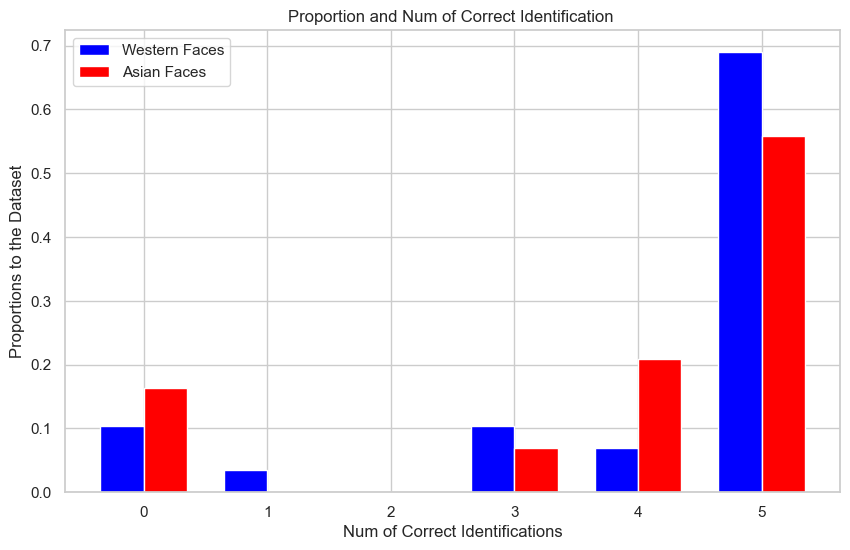

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Assuming data_western and data_asian are your datasets
percentage_data = data_western['correct'].value_counts(normalize=True).sort_index()
percentage_data_asian = data_asian['correct'].value_counts(normalize=True).sort_index()

# Ensuring all correct values from 0 to 5 are included
all_values = np.arange(0, 6)
percentage_data = percentage_data.reindex(all_values, fill_value=0).sort_index()
percentage_data_asian = percentage_data_asian.reindex(all_values, fill_value=0).sort_index()

# Setting up the positions for the bars
bar_width = 0.35
index = np.arange(len(all_values))  # Length should be 6 as we are considering 'correct' values from 0 to 5

# Creating the barplot with Matplotlib
plt.bar(index, percentage_data, bar_width, label='Western Faces', color='blue')
plt.bar(index + bar_width, percentage_data_asian, bar_width, label='Asian Faces', color='red')

# Additional plot settings
plt.title('Proportion and Num of Correct Identification ')
plt.xlabel('Num of Correct Identifications')
plt.ylabel('Proportions to the Dataset')
plt.xticks(index + bar_width / 2, all_values)  # Set x-ticks to be in the middle of the grouped bars
plt.legend()

# Display the plot
plt.show()


### Result analysis
The result suggested that for 0 correct identifications, there are more Chinese celebrities, meaning more chinese celebrities are not identified correctly. For the last case where all the 5 images from one celebrity are identified successfully,there are more western than chinese. This is aligned with our assumption that the facerekognition API has some bias and tend to recognize better in western celebrities. 